Examen de Certificación – Intento 3

Fundamentos de Data Science
Analizando la Satisfacción de Clientes en la Industria Hotelera

Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

El dataset puede ser encontrado aquí.
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

Limpieza de datos con Python:
Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.


In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hotel_bookings.csv')
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [3]:
# Encuentra filas duplicadas (considerando todas las columnas)
duplicates = data[data.duplicated()]

# Muestra las filas duplicadas
print(duplicates)

# Cuenta el número de filas duplicadas
num_duplicates = duplicates.shape[0]
print(f"Número de filas duplicadas: {num_duplicates}")

#Numero significativo de fila duplicadas. Número de filas duplicadas: 31994
# Se procede a eliminar


               hotel  is_canceled  lead_time  arrival_date_year  \
5       Resort Hotel            0         14               2015   
22      Resort Hotel            0         72               2015   
43      Resort Hotel            0         70               2015   
138     Resort Hotel            1          5               2015   
200     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number  \
5                    July                        27   
22                   July                        27   
43                   July     

In [4]:
# elimina los duplicados y crea un nuevo DataFrame data_sin_duplicados
data_sin_duplicados = data.drop_duplicates()



Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [9]:
data_sin_duplicados.shape

(87396, 32)

In [10]:
data_sin_duplicados.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

Se verficaron todos los tipos de datos y no encontre inconsistencias.


Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).

In [11]:
unique_values = data_sin_duplicados['customer_type'].unique()
print(unique_values)

#busqueda de inconsistencias de datos

['Transient' 'Contract' 'Transient-Party' 'Group']


In [12]:
unique_values = data_sin_duplicados['hotel'].unique()
print(unique_values)

#busqueda de inconsistencias de datos

['Resort Hotel' 'City Hotel']


In [13]:
unique_values = data_sin_duplicados['country'].unique()
print(unique_values)

#busqueda de inconsistencias de datos

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA'

In [14]:
unique_values = data_sin_duplicados['agent'].unique()
print(unique_values)

#busqueda de inconsistencias de datos

[ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.  42.  20.  19.
  45. 

Se detecta un inconsistencia NaN en Agent.


In [20]:
filas_con_nan = data_sin_duplicados[data_sin_duplicados['agent'].isnull()]
print(filas_con_nan)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
6       Resort Hotel            0          0               2015   
18      Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119124    City Hotel            0          0               2017   
119151    City Hotel            0          0               2017   
119166    City Hotel            0          0               2017   
119215    City Hotel            0          2               2017   
119248    City Hotel            0         22               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

Supongamos que estos 12.093 registros con Agent igual a Null son clientes sin agentes.  Para no eliminarlos del DataSet


Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

In [21]:
data_sin_duplicados.isnull().sum()
print(data_sin_duplicados.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [23]:
# se procedio a llenado las columans nulas
data['country'].fillna('Desconocido', inplace=True)  # Usando "Desconocido"

In [24]:
print(data_sin_duplicados.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [26]:
# se procedio a llenado las columans nulas
data['agent'].fillna('999', inplace=True)  # Usando "999"
print (data.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [27]:
# se procedio a llenado las columans nulas
data['company'].fillna('888.0', inplace=True)  # Usando "999"
print (data.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

<ipython-input-27-14967495e045>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['company'].fillna('888.0', inplace=True)  # Usando "999"
<ipython-input-27-14967495e045>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '888.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['company'].fillna('888.0', inplace=True)  # Usando "999"


Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).

In [28]:
# Valores faltantes en cada columna
missing_values = data.isnull().sum()
print(missing_values)

# Mostrar las filas con valores faltantes
rows_with_missing = data[data.isnull().any(axis=1)]
print(rows_with_missing)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Sin valores faltantes. Todo ok

Exploración de datos con Python:
Visualizaciones exploratorias univariadas:
- Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

1. Histograma para la distribución de la variable 'lead_time':

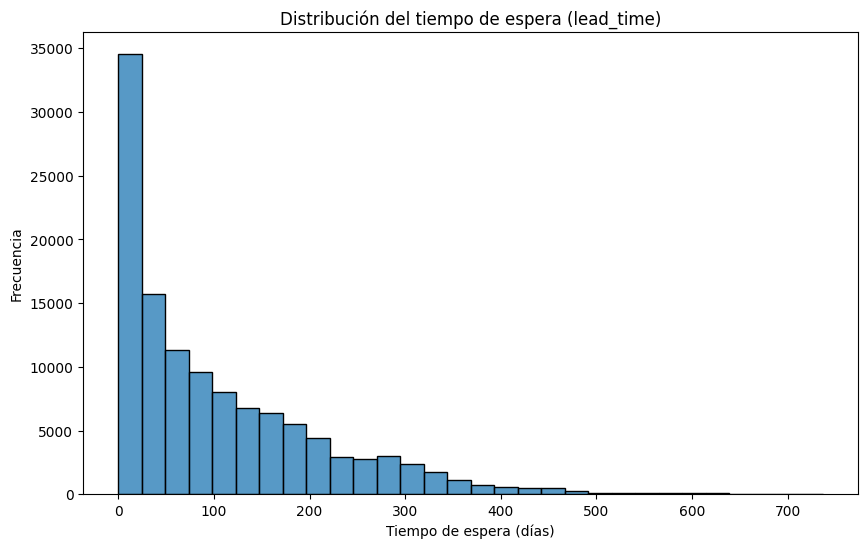

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para 'lead_time'
plt.figure(figsize=(10, 6))
sns.histplot(data['lead_time'], bins=30)
plt.title('Distribución del tiempo de espera (lead_time)')
plt.xlabel('Tiempo de espera (días)')
plt.ylabel('Frecuencia')
plt.show()

# Interpretación:
# El histograma muestra que la mayoría de las reservas se realizan con un
# tiempo de espera relativamente corto, # con una concentración en los valores
# menores a 100 días.
# También se observa una cola larga hacia la derecha, lo que indica la presencia de algunas reservas realizadas
# con mucha anticipación.

2. Gráfico de barras para la variable 'hotel':

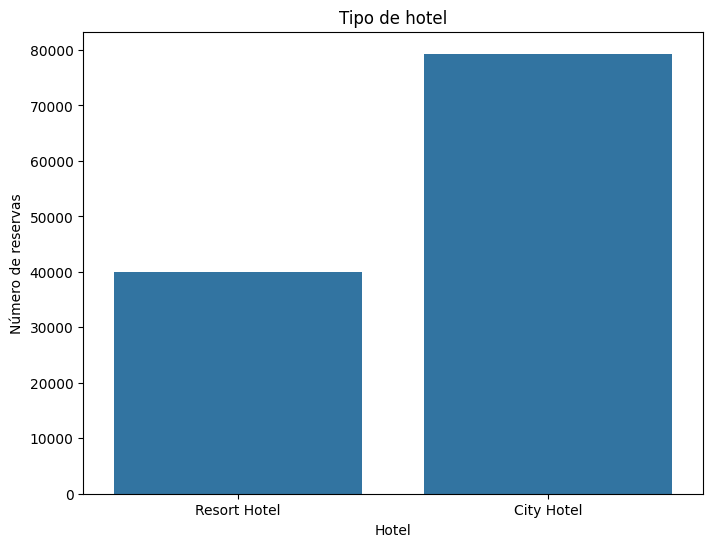

In [30]:
# Gráfico de barras para 'hotel'
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel', data=data)
plt.title('Tipo de hotel')
plt.xlabel('Hotel')
plt.ylabel('Número de reservas')
plt.show()

# Interpretación:
# El gráfico de barras muestra que el hotel 'City Hotel' tiene un mayor número de
#  reservas en comparación con el
# 'Resort Hotel'. Esto indica una mayor demanda o popularidad del hotel de ciudad.

Conclusiones.

Histograma:
- Muestra la distribución de una variable numérica continua, como 'lead_time', dividiendo los datos en intervalos (bins) y mostrando la frecuencia de observaciones en cada intervalo.
Gráfico de barras:
- Muestra la frecuencia de cada categoría en una variable categórica, como 'hotel', utilizando barras de diferentes alturas.



Visualizaciones exploratorias multivariadas:
- Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

1. Diagrama de dispersión para 'lead_time' vs 'adr' (precio promedio diario), con diferenciación por 'hotel':

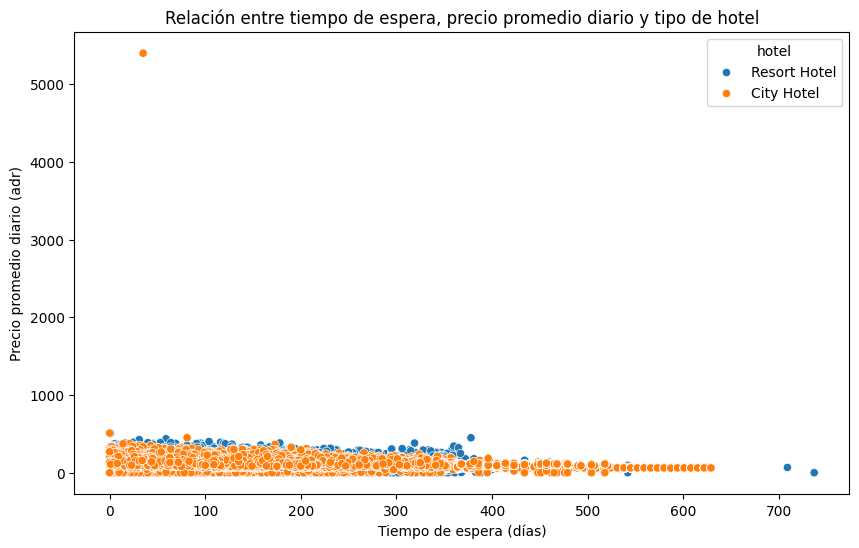

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de dispersión para 'lead_time' vs 'adr', con diferenciación por 'hotel'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='adr', hue='hotel', data=data)
plt.title('Relación entre tiempo de espera, precio promedio diario y tipo de hotel')
plt.xlabel('Tiempo de espera (días)')
plt.ylabel('Precio promedio diario (adr)')
plt.show()

# Interpretación:
# El diagrama de dispersión muestra la relación entre el tiempo de espera y el precio promedio diario,
# diferenciando por tipo de hotel. Se observa que para ambos tipos de hotel, no hay una clara correlación
# entre estas dos variables. Sin embargo, se puede apreciar que el 'Resort Hotel' tiende a tener precios
# promedio diarios más altos en general, y que las reservas con mayor tiempo de espera en el 'City Hotel'
# pueden tener precios promedio diarios más variables.

2. Gráfico de caja para 'adr' (precio promedio diario) por 'arrival_date_month', con diferenciación por 'hotel':

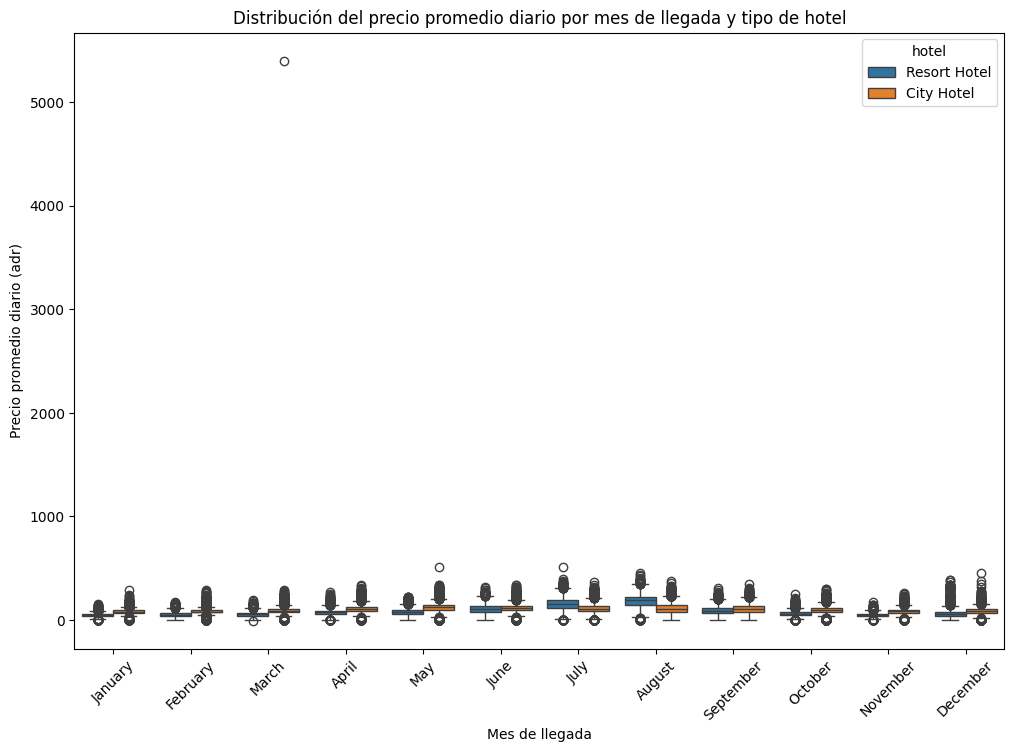

In [32]:
# Gráfico de caja para 'adr' por 'arrival_date_month', con diferenciación por 'hotel'
plt.figure(figsize=(12, 8))
sns.boxplot(x='arrival_date_month', y='adr', hue='hotel', data=data, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Distribución del precio promedio diario por mes de llegada y tipo de hotel')
plt.xlabel('Mes de llegada')
plt.ylabel('Precio promedio diario (adr)')
plt.xticks(rotation=45)
plt.show()

# Interpretación:
# El gráfico de caja muestra la distribución del precio promedio diario por mes de llegada,
# diferenciando por tipo de hotel. Se observa que el 'Resort Hotel' tiende a tener precios promedio diarios
# más altos en los meses de verano (julio y agosto), mientras que el 'City Hotel' tiene precios más altos
# en los meses de primavera y otoño. También se puede apreciar la variabilidad en los precios promedio diarios
# para cada mes y tipo de hotel.

Análisis adicional:
Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

In [33]:
import pandas as pd

# Resumen estadístico
resumen_estadistico = data.describe()

# Imprimir el resumen
print(resumen_estadistico)

"""
Interpretacion
Medidas de tendencia central:

lead_time (mean = 104.01): En promedio, las reservas se realizan con 104 días de anticipación.
stays_in_weekend_nights (mean = 0.93): Los huéspedes se quedan en promedio menos de una noche de fin de semana.
stays_in_week_nights (mean = 2.50): Los huéspedes se quedan en promedio 2.5 noches entre semana.
adults (mean = 1.86): Las reservas suelen ser para 1 o 2 adultos.
children (mean = 0.10): Hay pocos niños por reserva en promedio.
babies (mean = 0.01): Hay muy pocos bebés por reserva en promedio.
adr (mean = 101.83): El precio promedio diario es de 101.83.
previous_cancellations (mean = 0.09): Las cancelaciones previas son poco frecuentes.
previous_bookings_not_canceled (mean = 0.14): Los huéspedes repiten su estancia en el hotel con poca frecuencia.
booking_changes (mean = 0.22): Se realizan pocos cambios en las reservas en promedio.
days_in_waiting_list (mean = 2.32): Las reservas suelen confirmarse rápidamente, con pocos días en lista de espera.
required_car_parking_spaces (mean = 0.06): Pocos huéspedes requieren plazas de aparcamiento.
total_of_special_requests (mean = 0.57): Los huéspedes suelen realizar menos de una petición especial por reserva.
Medidas de dispersión:

lead_time (std = 106.86): Hay una gran variabilidad en el tiempo de anticipación con el que se realizan las reservas. Algunas reservas se realizan con mucha anticipación, mientras que otras se hacen con poca.
adr (std = 50.54): El precio promedio diario varía considerablemente, lo que sugiere diferentes tipos de habitaciones o tarifas.
stays_in_weekend_nights (std = 0.99), stays_in_week_nights (std = 1.91): La duración de la estancia también varía, con algunas estancias cortas y otras más largas.
Interpretación general:

El hotel recibe reservas con una amplia variedad de tiempos de anticipación, precios y duraciones de estancia.
Las reservas suelen ser para 1 o 2 adultos, con pocos niños o bebés.
Las cancelaciones y los cambios en las reservas son poco frecuentes.
Los huéspedes repiten su estancia en el hotel con poca frecuencia.
La mayoría de las reservas se confirman rápidamente, con pocos días en lista de espera.
Pocos huéspedes requieren plazas de aparcamiento o realizan peticiones especiales.
"""


         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

A continuacion, algunas tendencias notables observadas en los datos, basándome en las visualizaciones y estadísticas descriptivas que hemos generado:

Tendencias notables:

- Tiempo de espera y precio: Aunque el diagrama de dispersión no muestra una correlación lineal fuerte entre el tiempo de espera (lead_time) y el precio promedio diario (adr), se puede observar una ligera tendencia a que las reservas con mayor tiempo de espera tengan un adr más variable, especialmente en el caso del City Hotel. Esto podría indicar que las reservas realizadas con mucha anticipación son más propensas a tener precios especiales o descuentos.
- Tipo de hotel y precio: El gráfico de caja muestra que el Resort Hotel tiende a tener precios promedio diarios (adr) más altos que el City Hotel en la mayoría de los meses. Esto es esperable, ya que los Resort Hotel suelen ofrecer más servicios e instalaciones, lo que se refleja en un precio más alto. Además, el Resort Hotel tiene precios más altos en los meses de verano (julio y agosto), mientras que el City Hotel tiene precios más altos en los meses de primavera y otoño. Esto podría deberse a la estacionalidad de la demanda en cada tipo de hotel.
- Duración de la estancia: Las estadísticas descriptivas muestran que los huéspedes se quedan en promedio menos de una noche de fin de semana (stays_in_weekend_nights) y 2.5 noches entre semana (stays_in_week_nights). Esto sugiere que el hotel recibe principalmente reservas para estancias cortas, posiblemente de viajeros de negocios o turistas que hacen una parada rápida en la ciudad.
Cancelaciones y cambios: Las estadísticas descriptivas muestran que las cancelaciones previas (previous_cancellations) y los cambios en las reservas (booking_changes) son poco frecuentes. Esto indica que la mayoría de las reservas se mantienen según lo planeado, lo que es positivo para el hotel.
- Huéspedes repetidos: Las estadísticas descriptivas muestran que los huéspedes repiten su estancia en el hotel con poca frecuencia (is_repeated_guest y previous_bookings_not_canceled). Esto podría indicar una oportunidad para el hotel de implementar estrategias para fidelizar a sus clientes y aumentar la tasa de repetición.

Gracias. Raul D. Caceres P